In [1]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

CPU times: user 2.91 s, sys: 223 ms, total: 3.13 s
Wall time: 3.13 s


In [2]:
df = pd.read_excel('final.xlsx')
df.columns

Index(['text', 'label'], dtype='object')

In [3]:
df.head()

,text,label
0,it's amazing that no matter how hard you try t...,1
1,It's quite heartbreaking to see some of my clo...,1
2,please stop telling me u love me- the words th...,1
3,Why do people say they know me when they don't...,1
4,You took a knife and stabbed it straight throu...,1


In [4]:
df['label'].value_counts()

0    5434
1    1096
Name: label, dtype: int64

In [5]:
df.isnull().sum()

text     10
label     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(6520, 2)

In [8]:
df.head()

,text,label
0,it's amazing that no matter how hard you try t...,1
1,It's quite heartbreaking to see some of my clo...,1
2,please stop telling me u love me- the words th...,1
3,Why do people say they know me when they don't...,1
4,You took a knife and stabbed it straight throu...,1


In [9]:
df_n = df.sample(frac=1)
df_n.head()

,text,label
3056,It's only at this hour that I want Nasi Padang...,0
5380,why can't your eyes be so empty,0
5190,fookrey is love.,0
447,mentally down because social media is not that...,1
3274,"""Dear women"" Later on Eid, don't ask for forgi...",0


In [10]:
import string
import nltk

def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    stopword = stopwords.words('english')
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopword]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)

In [12]:
df_n['cleaned'] = df['text'].apply(text_transformation)

In [13]:
df_n

,text,label,cleaned
3056,It's only at this hour that I want Nasi Padang...,0,it s only at this hour that i want nasi padang...
5380,why can't your eyes be so empty,0,why can t your eyes be so empty
5190,fookrey is love.,0,fookrey is love
447,mentally down because social media is not that...,1,mentally down because social media is not that...
3274,"""Dear women"" Later on Eid, don't ask for forgi...",0,dear women later on eid don t ask for forgi...
...,...,...,...
3741,"if there was a man who said to me like this: ""...",0,if there was a man who said to me like this ...
6139,Preparing dataset is fucking hard.,0,preparing dataset is fucking hard
172,"Honestly, I'm really nervous",1,honestly i m really nervous
4436,This mosque is beatiful.,0,this mosque is beatiful


In [14]:
df_n.tail()

,text,label,cleaned
3741,"if there was a man who said to me like this: ""...",0,if there was a man who said to me like this ...
6139,Preparing dataset is fucking hard.,0,preparing dataset is fucking hard
172,"Honestly, I'm really nervous",1,honestly i m really nervous
4436,This mosque is beatiful.,0,this mosque is beatiful
4887,morning bestie,0,morning bestie


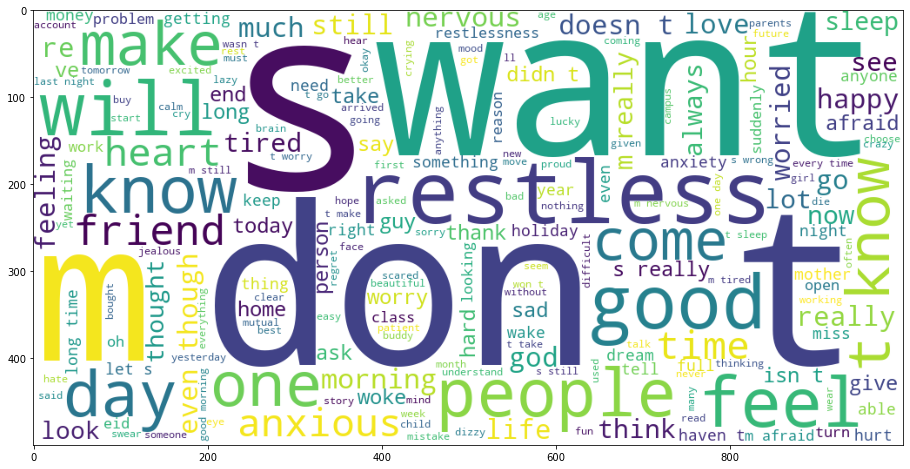

In [15]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df_n['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [16]:
%%time
max_words = 10000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(df_n['cleaned'])

CPU times: user 147 ms, sys: 160 µs, total: 147 ms
Wall time: 146 ms


In [17]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

3239
CPU times: user 2.15 ms, sys: 0 ns, total: 2.15 ms
Wall time: 1.43 ms


Frequency Distribution

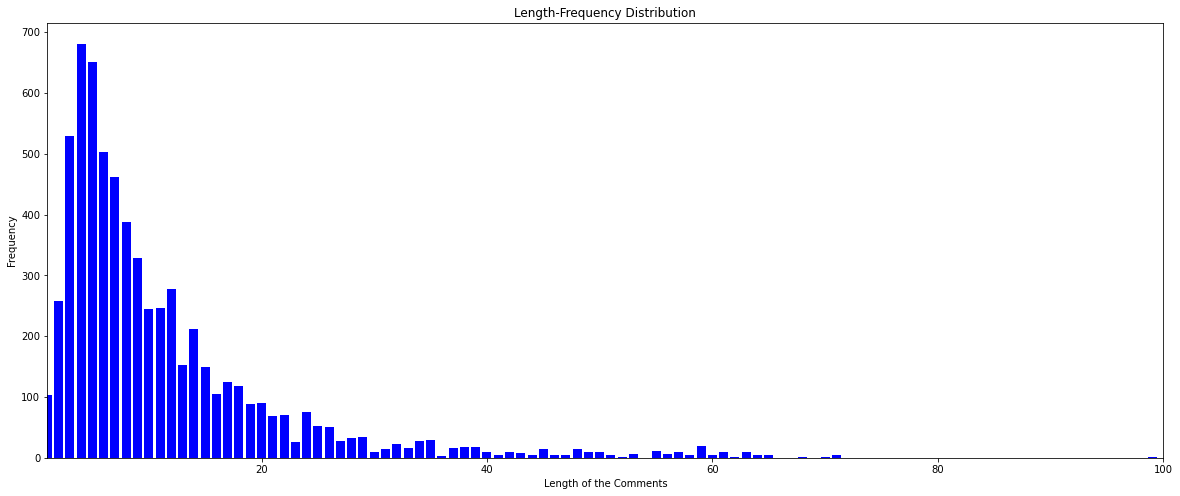

Maximum Length of a Comment: 335
Minimum Length of a Comment: 1
Average Length of a Comment: 11.0


In [18]:
df_n['Comment_Length'] = df_n.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in df_n.Comment_Length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Comments')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a Comment: {max(df_n.Comment_Length)}")
print(f"Minimum Length of a Comment: {min(df_n.Comment_Length)}")
print(f"Average Length of a Comment: {round(np.mean(df_n.Comment_Length),0)}")

In [19]:
df_n[df_n['Comment_Length'] == 335]

,text,label,cleaned,Comment_Length
1,It's quite heartbreaking to see some of my clo...,1,it s quite heartbreaking to see some of my clo...,335


In [20]:
sequences = tokenizer.texts_to_sequences(df_n['cleaned'])

In [21]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(df_n['cleaned'][0])
print()
print(sequences[0])


Found 3239 unique tokens.
it s amazing that no matter how hard you try to get them to know your hurting they just don t look past the fake smile and the fake laughter    miss you papa   

[6, 9, 103, 42, 16, 301, 18, 1, 22, 1227, 1228, 29, 771, 11, 772, 286, 444, 51, 75]


In [22]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Review length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 60)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])

Maximum Review length 335
[ 26  35   8  47 272  17  15 585   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
CPU times: user 56.4 ms, sys: 16 µs, total: 56.4 ms
Wall time: 53.5 ms


In [23]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(df_n['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (6520, 60)
it s amazing that no matter how hard you try to get them to know your hurting they just don t look past the fake smile and the fake laughter    miss you papa    
 [   6    9  103   42   16  301   18    1   22 1227 1228   29  771   11
  772  286  444   51   75    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]
it s quite heartbreaking to see some of my closest friends whom i have adored a lot all throughout my varsity life signing off from the campus  it hurts a lot thinking about not roaming around the campus with them or not being able to find them after the graduation anymore  my campus life hasn t been a smooth journey  it has seen ups   downs  the people with whom i had been close in the first year or  year hadn t been there all the way to the end  but some people being there even in dire need

In [24]:
from keras.utils import to_categorical
y = to_categorical(df_n.label)
X_train,X_test,y_train,y_test = train_test_split(corpus,y,test_size = 0.2, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (5216, 60)
Test Size:  (1304, 60)


BiGRU

In [25]:
import keras.backend as K 
from keras.models import Sequential
from keras.layers import Flatten,Dense,Bidirectional,LSTM,GRU,Embedding
from keras.preprocessing.sequence import pad_sequences

In [26]:
K.clear_session()

In [27]:
maxlen = 50

In [28]:
corpus

array([[   6,    9,  103, ...,    0,    0,    0],
       [  26,   35,    8, ...,    0,    0,    0],
       [1229,    5,   67, ...,    0,    0,    0],
       ...,
       [ 872,    1,   12, ...,    0,    0,    0],
       [  16,  711,    5, ...,    0,    0,    0],
       [  54,  355,    0, ...,    0,    0,    0]], dtype=int32)

In [29]:
vocab_size = len(tokenizer.word_index) + 1
word_counts = tokenizer.word_counts

In [30]:
embedding_dim = 100
accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "BiGRU_no.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint] 

In [31]:
model = tf.keras.Sequential([
    Embedding(max_words, embedding_dim, input_length = maxlen, trainable=False),
    Bidirectional(GRU(64,dropout=0.2)),
    Dense(24, activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               63744     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
flatten (Flatten)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 50        
Total params: 1,066,890
Trainable params: 66,890
Non-trainable params: 1,000,000
_________________________________________________________________


In [32]:
history = model.fit(X_train,y_train,
                    epochs = 20,
                    batch_size = 32,
                    verbose = 1,
                    validation_split =0.1,
                    callbacks = callback_list
                    )

Epoch 1/20
147/147 [==============================] - 9s 39ms/step - loss: 0.5030 - accuracy: 0.8393 - val_loss: 0.4585 - val_accuracy: 0.8065

Epoch 00001: val_accuracy improved from -inf to 0.80651, saving model to BiGRU_no.h5
Epoch 2/20
147/147 [==============================] - 5s 32ms/step - loss: 0.4004 - accuracy: 0.8347 - val_loss: 0.4139 - val_accuracy: 0.8218

Epoch 00002: val_accuracy improved from 0.80651 to 0.82184, saving model to BiGRU_no.h5
Epoch 3/20
147/147 [==============================] - 5s 36ms/step - loss: 0.3713 - accuracy: 0.8458 - val_loss: 0.3510 - val_accuracy: 0.8487

Epoch 00003: val_accuracy improved from 0.82184 to 0.84866, saving model to BiGRU_no.h5
Epoch 4/20
147/147 [==============================] - 5s 35ms/step - loss: 0.2952 - accuracy: 0.8975 - val_loss: 0.3702 - val_accuracy: 0.8716

Epoch 00004: val_accuracy improved from 0.84866 to 0.87165, saving model to BiGRU_no.h5
Epoch 5/20
147/147 [==============================] - 5s 33ms/step - loss: 

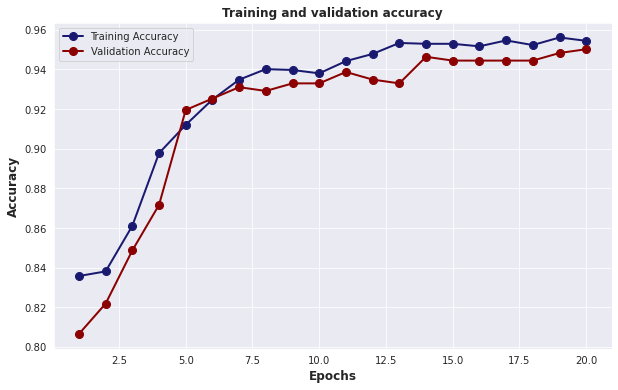

In [33]:
plt.figure(figsize=(10,6))
import seaborn as sns
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')
                  #=========================================================
                  ############### Epochs vs Validation Accuracy Plot ##########
                  #==========================================================

plt.plot(epochs, acc, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

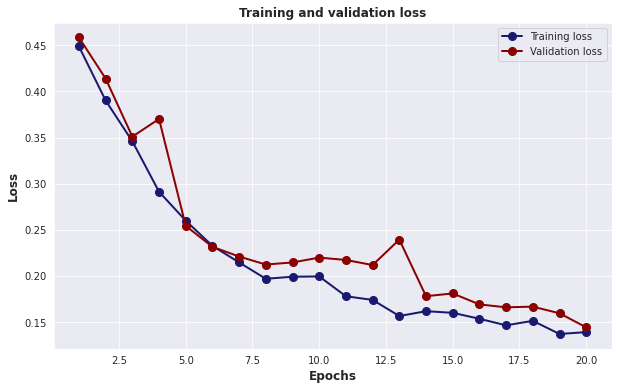

In [34]:
plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2, 
          marker='o', markersize=8,label='Training loss')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2, 
          marker='o', markersize=8,label='Training loss')
plt.title('Training and validation loss',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Training loss','Validation loss'])

In [36]:
from keras.models import load_model
loaded_model = load_model("BiGRU_no.h5")

In [37]:
X_train,X_test,y_train,y_test = train_test_split(corpus,df_n.label,test_size = 0.2,random_state = 42)

In [38]:
y_pred = np.argmax(loaded_model.predict(X_test), axis=-1)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1077
           1       0.97      0.80      0.88       227

    accuracy                           0.96      1304
   macro avg       0.96      0.90      0.93      1304
weighted avg       0.96      0.96      0.96      1304



<AxesSubplot:>

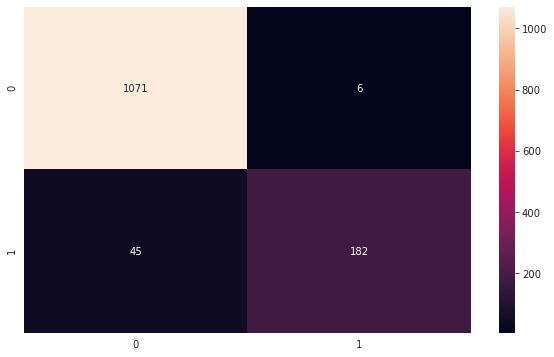

In [40]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')